In [47]:
%matplotlib notebook

In [48]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [49]:
import matplotlib.pyplot as plt
plt.plot?

In [50]:
plt.plot(3,2)

<IPython.core.display.Javascript object>

In [51]:
plt.plot(3,2,'.')

# Object API
- Interface with the artist layer

In [52]:
# import a new backend figurecanvasagg
from matplotlib.backends.backend_agg import FigureCanvasAgg
# import figure object
from matplotlib.figure import Figure

# new figure 
fig = Figure()
# associate it with the backend
canvas = FigureCanvasAgg(fig)

# 111 means we just want one plot
# return value of subplot is axes object 
#which contains methods for plotting
ax = fig.add_subplot(111)

ax.plot(3,2,'.')
# this backend isn't able to render this directly
# since it expects pyplot to create all of the objects
# so we will save the figure

canvas.print_png('test.png')

In [53]:
%%html
<img src='test.png'/>

In [54]:
plt.figure()
plt.plot(3,2,'o')
# grab the axes
ax = plt.gca()
# set the x and y limits
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>

(0.0, 6.0, 0.0, 10.0)

You can artist to an axes object at any time

In [55]:
plt.figure()
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

<IPython.core.display.Javascript object>

In [56]:
ax = plt.gca()
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

# Scatter plot

In [57]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x,y)


<IPython.core.display.Javascript object>

In [58]:
x1 = x
y1 = x1

colors = ['green']*(len(x1)-1)
colors.append('red')

plt.figure()

plt.scatter(x,y, s=100, c=colors)

<IPython.core.display.Javascript object>

# Zip function

In [59]:
zip_gen = zip([1,2,3,4,5],[6,7,8,9,10])
list(zip_gen)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [60]:
type(zip_gen)

zip

In [61]:
zip_gen

In [62]:
# unpacking using aestrisks
zip_gen = zip([1,2,3,4,5],[6,7,8,9,10])
x,y = zip(*zip_gen)
print(x,y)

(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


In [63]:
# Let's plot

plt.figure()
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
plt.scatter(x[2:],y[2:],s=100,c='blue',label='Short students')

<IPython.core.display.Javascript object>

In [64]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship b/w ball kicking and grade')

Text(0.5, 1.0, 'Relationship b/w ball kicking and grade')

In [65]:
plt.legend()

In [66]:
plt.legend(loc=4, frameon=False, title='Legend')

In [67]:
plt.gca().get_children()

 Text(0.5, 1.0, 'Relationship b/w ball kicking and grade'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [68]:
legend = plt.gca().get_children()[-2]

In [69]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [70]:
from matplotlib.artist import Artist

def rec_gc(art, depth = 0):
    if isinstance(art, Artist):
        print("  "*depth+str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(legend)

Legend
            Text(0, 0, 'Legend')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


# Line plots

In [71]:
line = np.array([1,2,3,4,5,6,7,8])
quadratic_data = line**2

plt.figure()
# -o flag is for dots
plt.plot(line, '-o', quadratic_data,'-o')

<IPython.core.display.Javascript object>

In [72]:
plt.plot([22,44,55], '--r')

In [73]:
plt.xlabel('some data')
plt.ylabel('some other data')
plt.title('Big ass title')
plt.legend(['Baseline','Competition','US'])

In [74]:
# fill between function for area highlighting
plt.gca().fill_between(range(len(line)),
                      line, quadratic_data, 
                      facecolor ='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


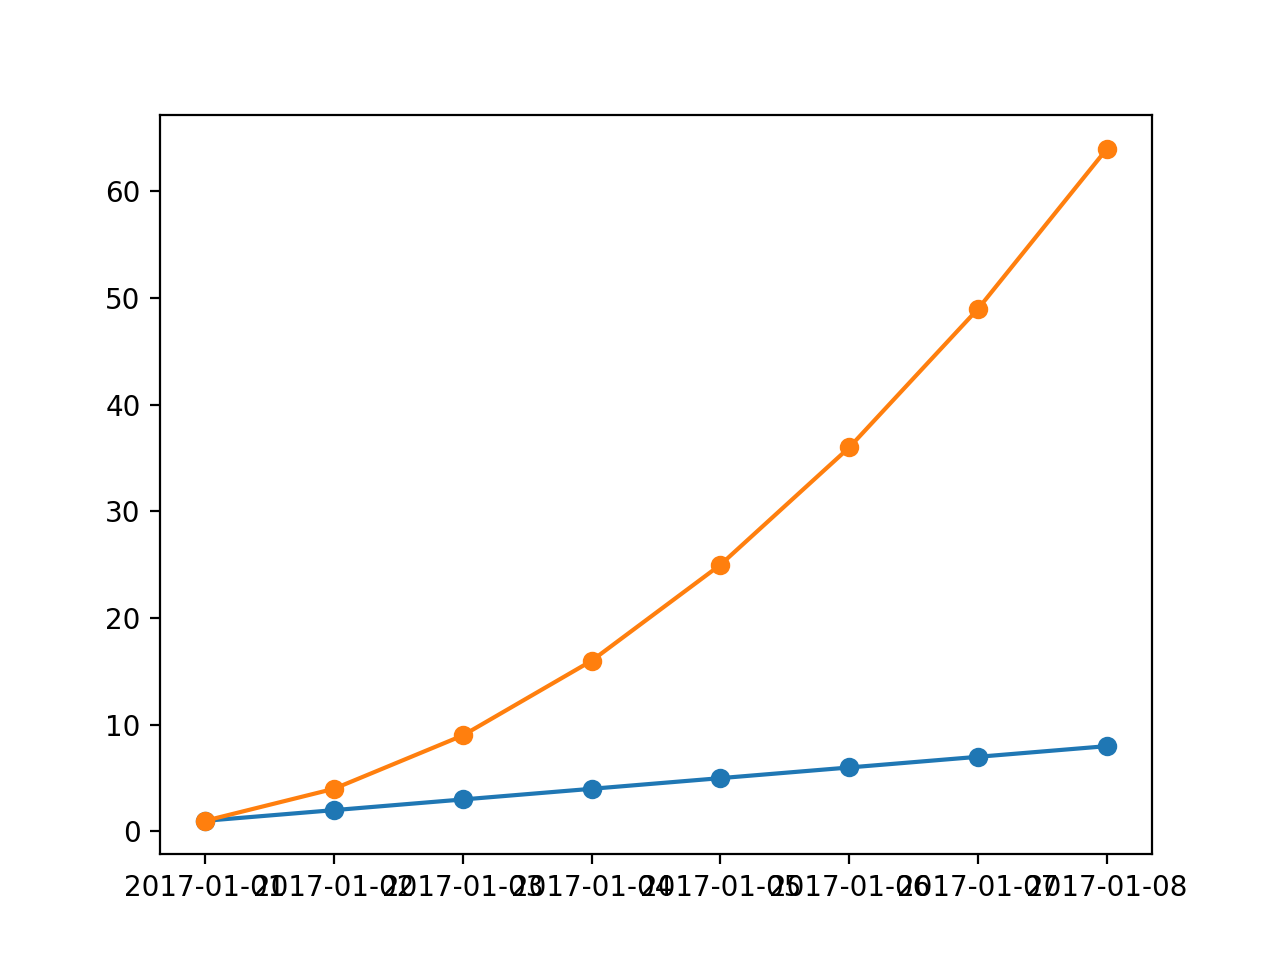

In [75]:
# change the x values to datatime instances

plt.figure()

obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
plt.plot(obs, line,'-o', obs, quadratic_data,'-o')

<IPython.core.display.Javascript object>


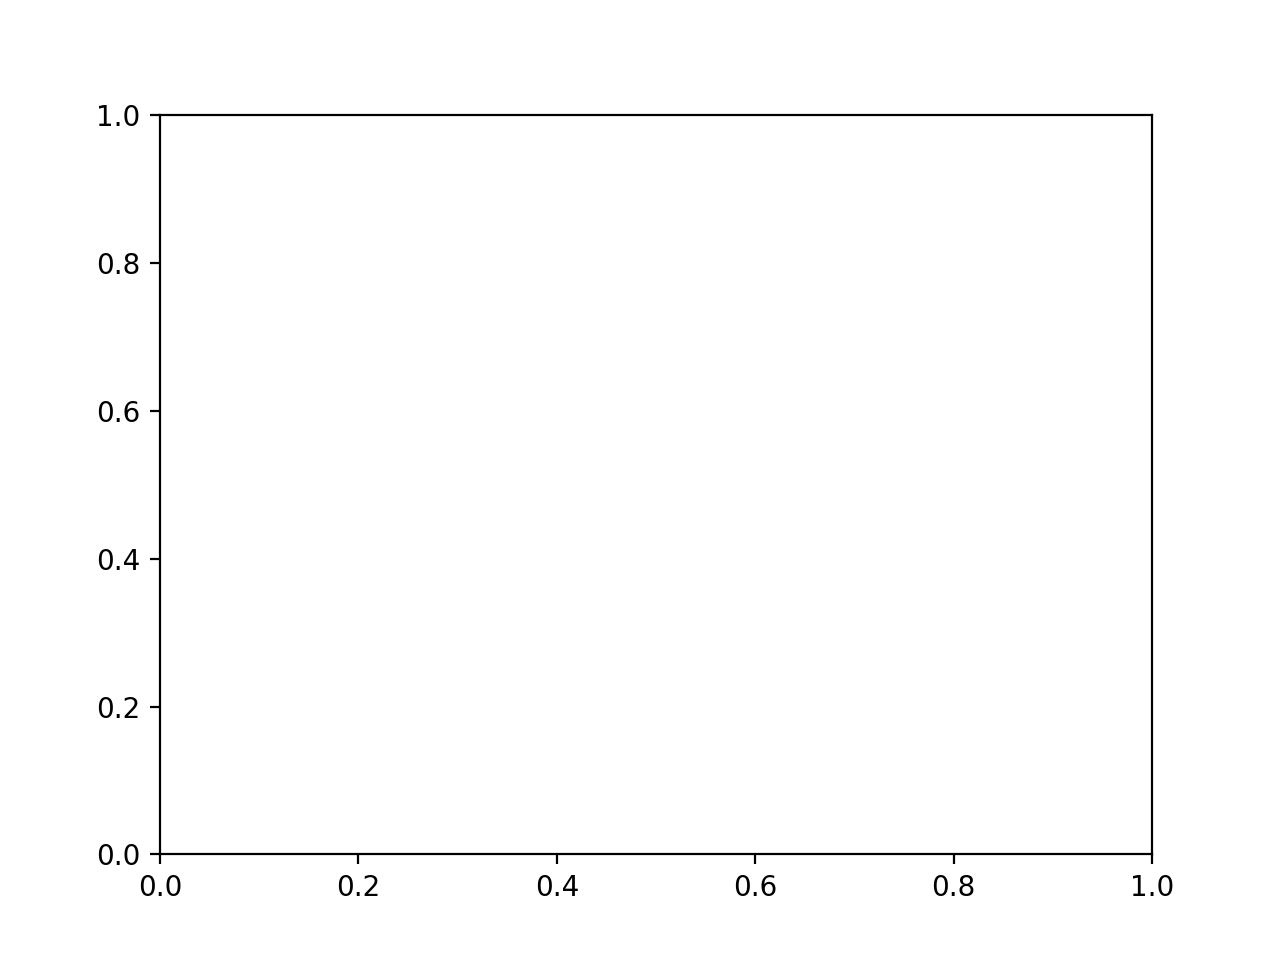

RuntimeError: matplotlib does not support generators as input

In [76]:
# Another better way for datetime

import pandas as pd

plt.figure()
obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
obs = map(pd.to_datetime, obs)


plt.plot(obs, line, '-o', obs, quadratic_data, '-o')

<IPython.core.display.Javascript object>


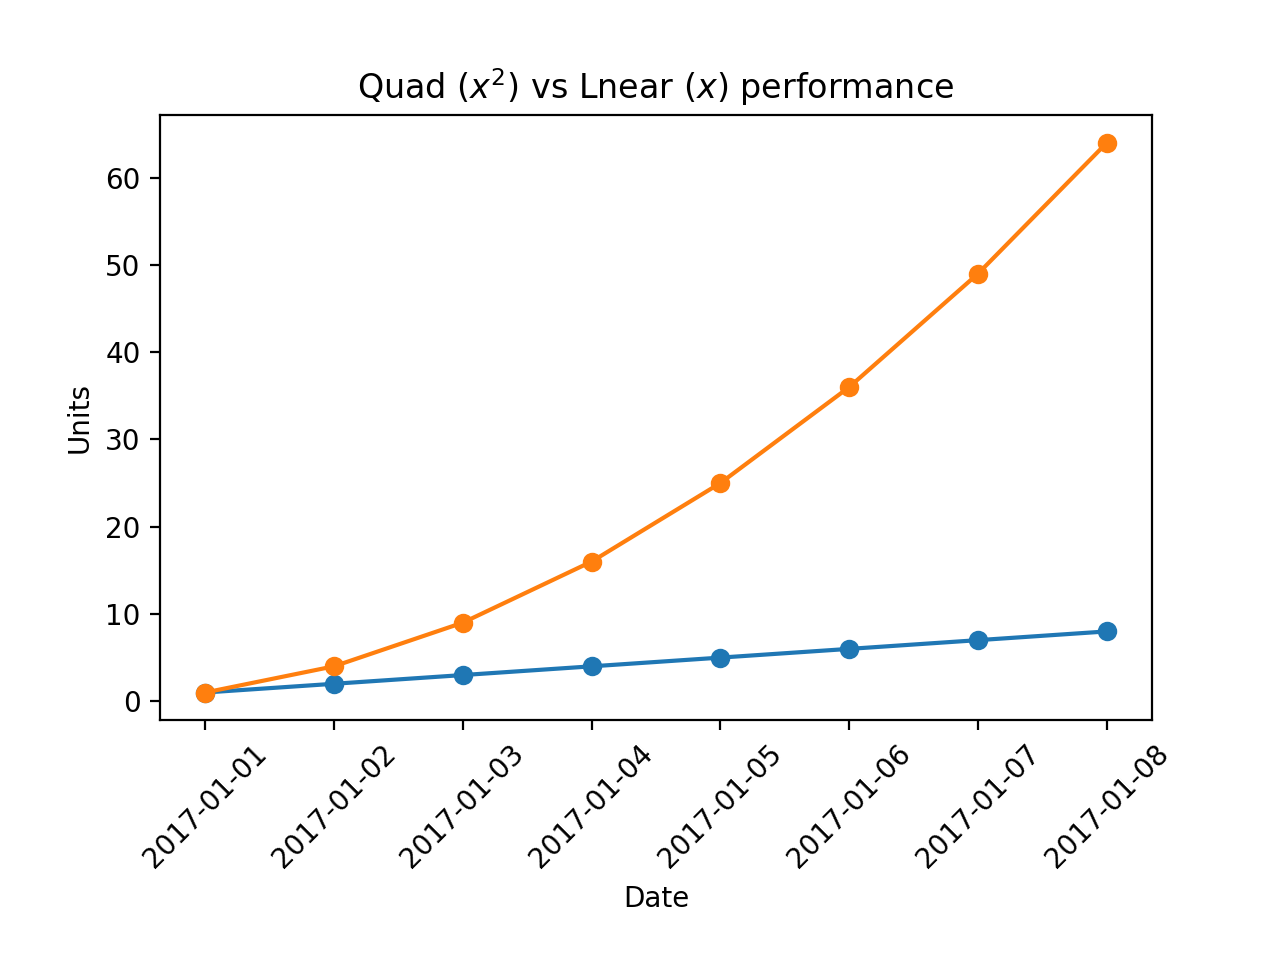

In [78]:
plt.figure()
obs = np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
obs = list(map(pd.to_datetime, obs))


plt.plot(obs, line, '-o', obs, quadratic_data, '-o')

# dates are overlapping, xlabel space

In [79]:
# Let's see what does the axis artist contains.

In [80]:
plt.gca().get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [81]:
xaxis = plt.gca().get_children()[-6]

In [82]:
rec_gc(xaxis)

XAxis(80.0,52.8)
    Text(0.5, 0, '')
    Text(1, 0, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, 0, '')
        Text(0, 1, '')


In [83]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [84]:
plt.subplots_adjust(bottom=0.25)

# Latex is there

In [85]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quad vs linear performance')

Text(0.5, 1.0, 'Quad vs linear performance')

In [86]:
ax.set_title('Quad ($x^2$) vs Lnear ($x$) performance')

Text(0.5, 1.0, 'Quad ($x^2$) vs Lnear ($x$) performance')

# Bar Charts 

<IPython.core.display.Javascript object>


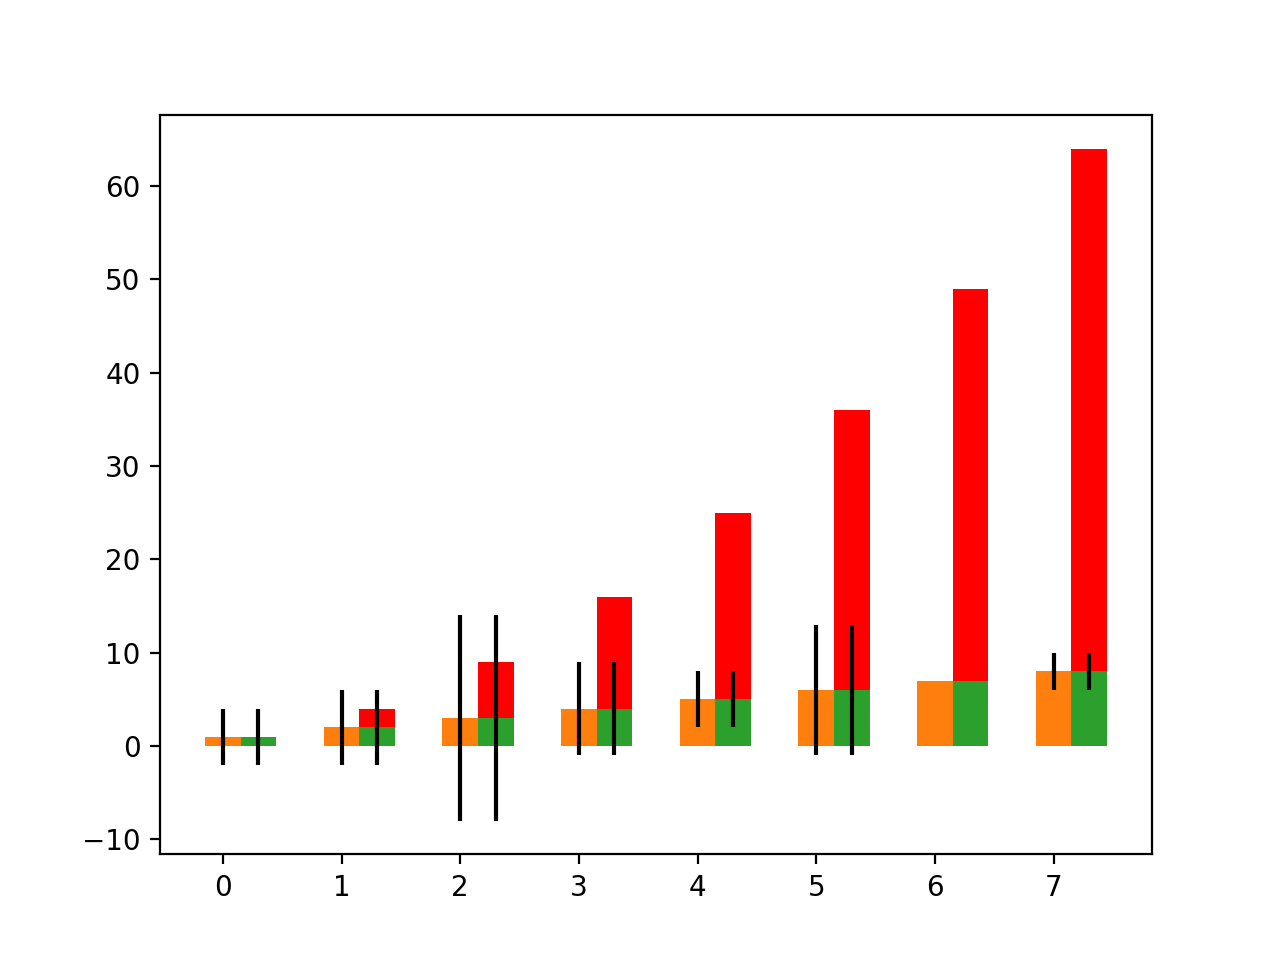

<BarContainer object of 8 artists>

In [87]:
plt.figure()
xvals = range(len(line))

plt.bar(xvals, line, width=0.3)

In [88]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals, quadratic_data, width=0.3, color='red')

<BarContainer object of 8 artists>

In [89]:
from random import randint

line_err = [randint(0,15) for x in range(len(line))]
plt.bar(xvals, line, width=0.3, yerr=line_err)

<BarContainer object of 8 artists>

In [90]:
plt.bar(new_xvals, line, width=0.3, yerr=line_err)

<BarContainer object of 8 artists>

## Stacked bar charts

<IPython.core.display.Javascript object>


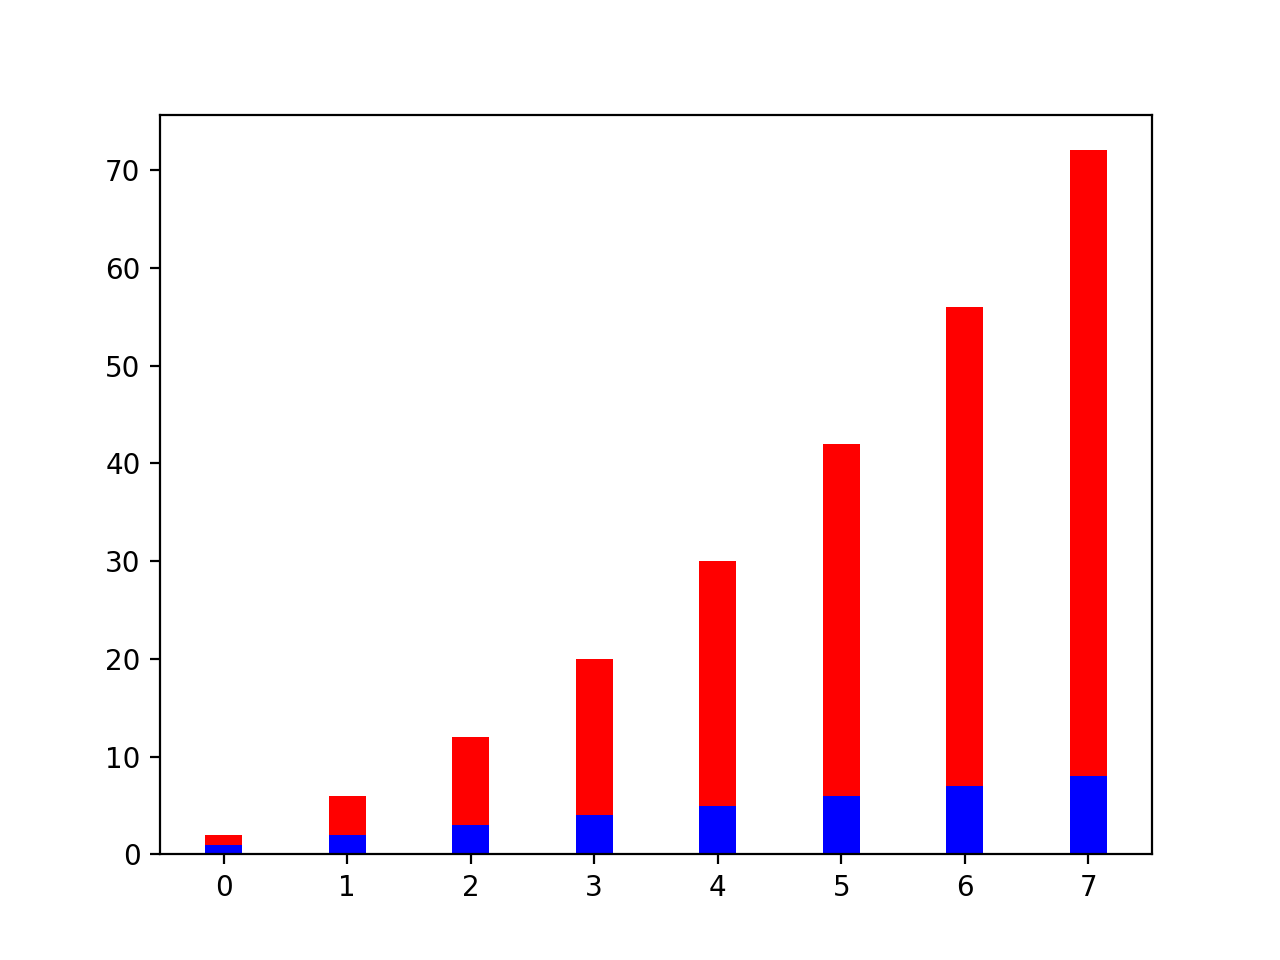

<BarContainer object of 8 artists>

In [91]:
plt.figure()

xvals = range(len(line))
plt.bar(xvals, line, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.3, bottom=line, color='r')


<IPython.core.display.Javascript object>


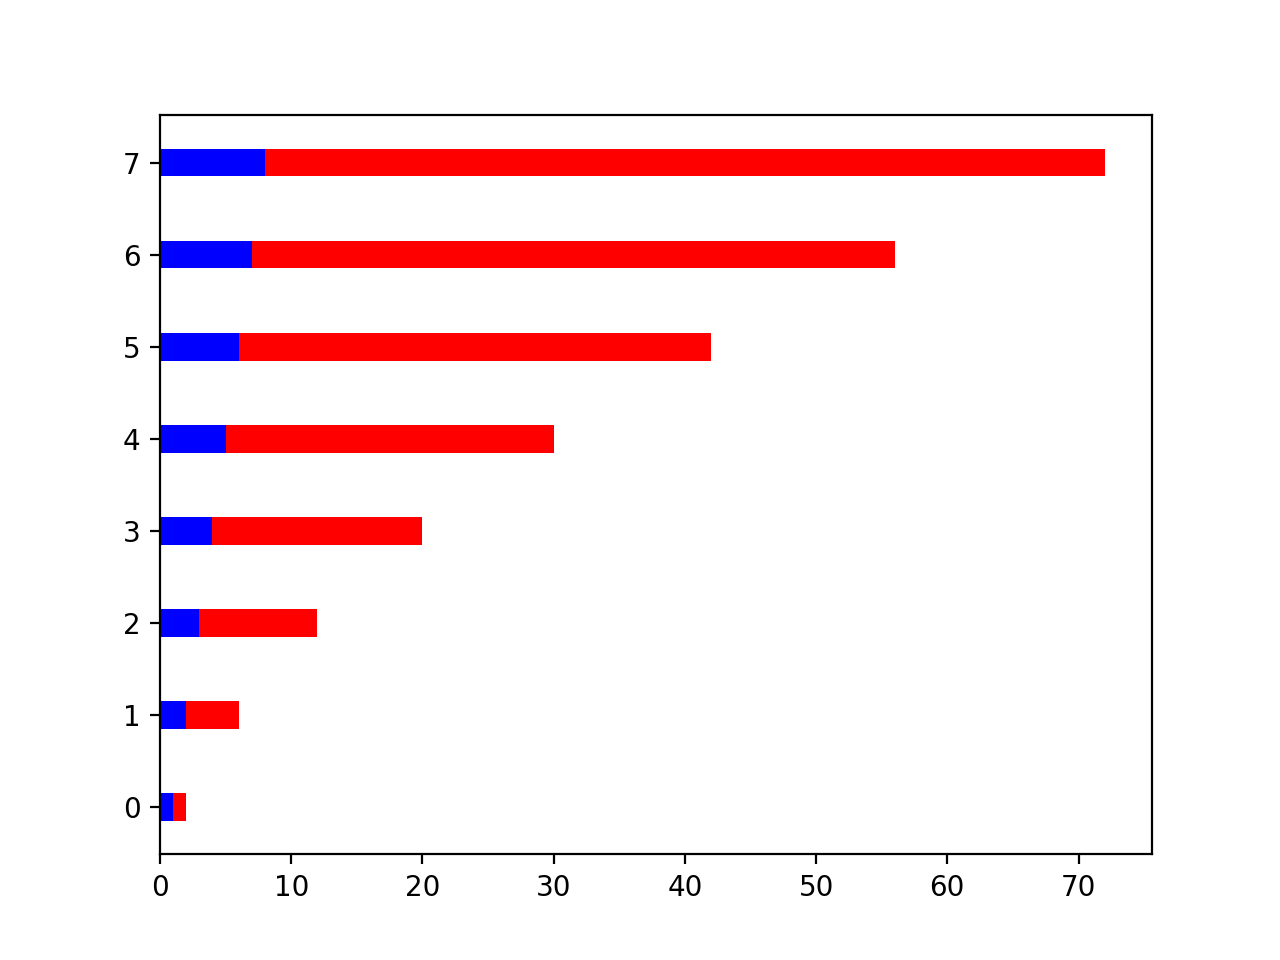

<BarContainer object of 8 artists>

In [92]:
plt.figure()

xvals = range(len(line))
plt.barh(xvals, line, height=0.3, color='b')
plt.barh(xvals, quadratic_data, height=0.3, left=line, color='r')

# Dejunkifying a plot

<IPython.core.display.Javascript object>


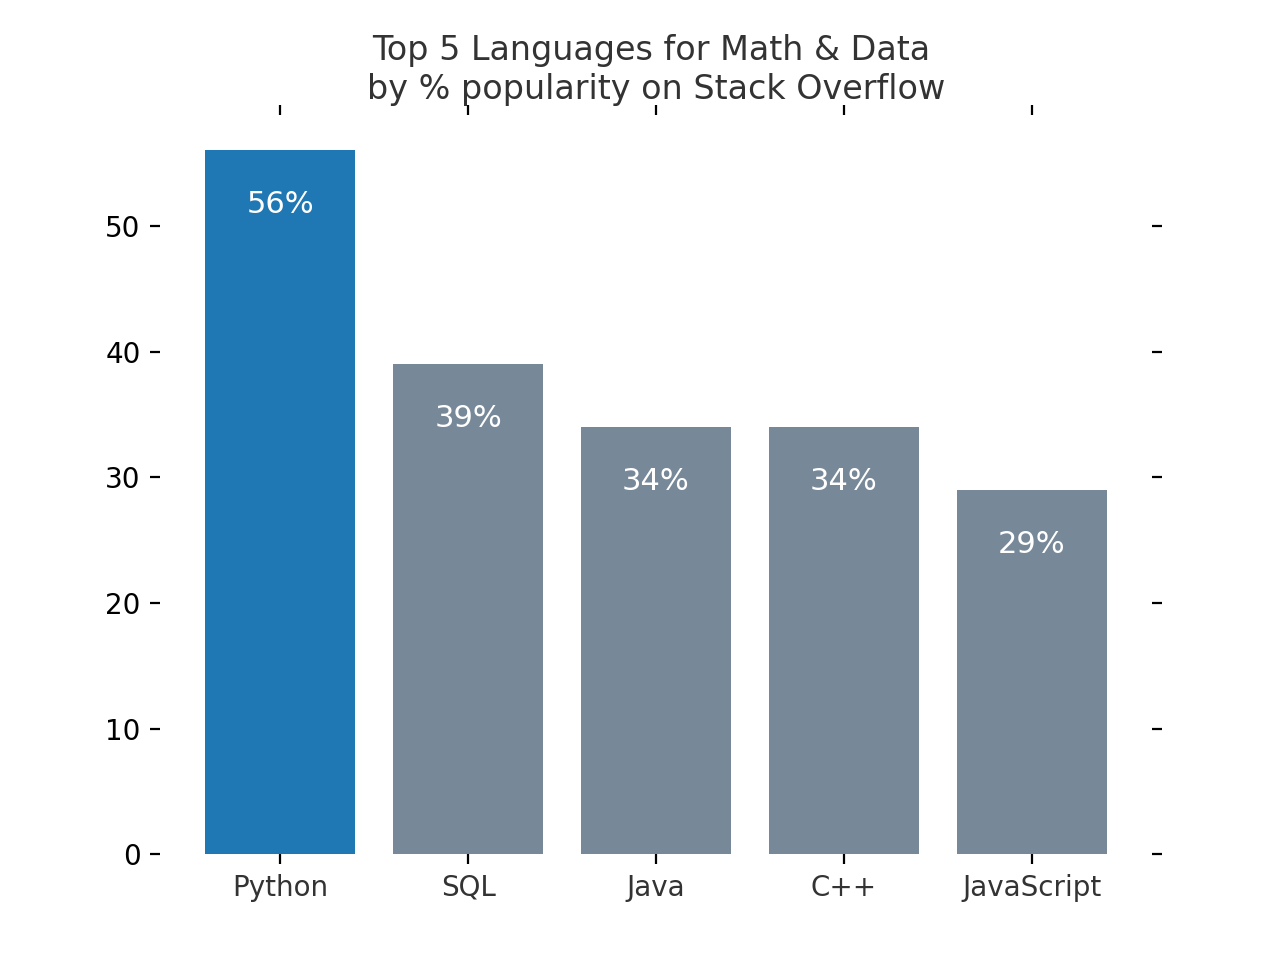

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()